In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.config.set_visible_devices([], 'GPU')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


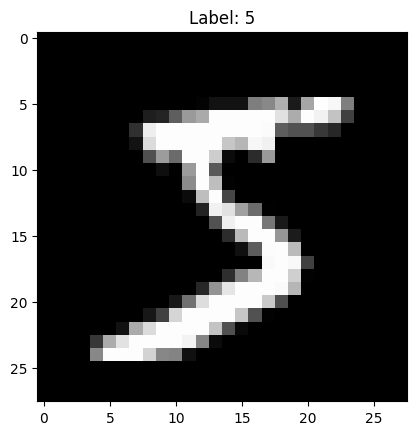

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the images (scale pixel values to range [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print dataset shape
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

# Show a sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [ ]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Print model summary
model.summary()


/Users/zeynmehezmacbook/miniconda3/envs/deepenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.8622 - loss: 0.4817 - val_accuracy: 0.9591 - val_loss: 0.1379
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.9558 - loss: 0.1480 - val_accuracy: 0.9696 - val_loss: 0.0974
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.9679 - loss: 0.1068 - val_accuracy: 0.9740 - val_loss: 0.0860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.9737 - loss: 0.0872 - val_accuracy: 0.9729 - val_loss: 0.0827
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.9772 - loss: 0.0743 - val_accuracy: 0.9784 - val_loss: 0.0704


In [7]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.9729 - loss: 0.0842

Test Accuracy: 0.9784


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step


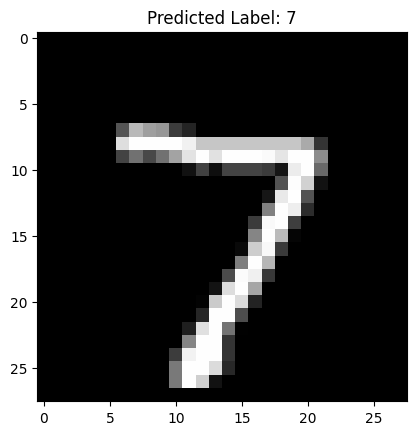

In [8]:
# Predict labels for test set
predictions = model.predict(x_test)

# Show first test image & predicted label
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
plt.show()


#### using CNN

In [9]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN: Add channel dimension (1 for grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Print shape
print(f"Training Data Shape: {x_train.shape}")
print(f"Test Data Shape: {x_test.shape}")


Training Data Shape: (60000, 28, 28, 1)
Test Data Shape: (10000, 28, 28, 1)


In [10]:
# Define CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),  # Flatten feature maps into a 1D vector
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Regularization
    keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Model Summary
model.summary()


/Users/zeynmehezmacbook/miniconda3/envs/deepenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8673 - loss: 0.4291 - val_accuracy: 0.9846 - val_loss: 0.0481
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9750 - loss: 0.0821 - val_accuracy: 0.9878 - val_loss: 0.0370
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9824 - loss: 0.0597 - val_accuracy: 0.9895 - val_loss: 0.0315
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9868 - loss: 0.0428 - val_accuracy: 0.9906 - val_loss: 0.0300
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9882 - loss: 0.0352 - val_accuracy: 0.9915 - val_loss: 0.0290


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9898 - loss: 0.0357

Test Accuracy: 0.9915


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


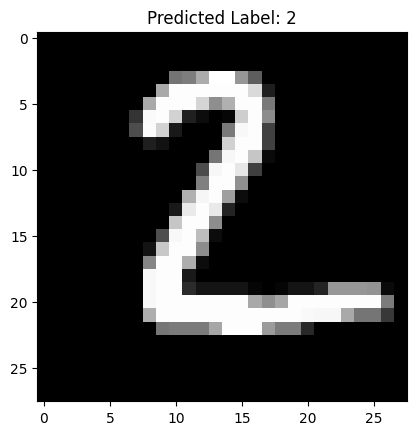

In [16]:
predictions = model.predict(x_test)

# Display first image and predicted label
plt.imshow(x_test[1].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[1])}")
plt.show()
